# Import and Load Dataset

In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("forbes billionaire list cleaned.csv")

In [3]:
# Sample test
df.sample(10)

,rank,name,net_worth (in billion $),age,country / territory,source,industry
2479,2405.0,Sunjay Kapur,1.1,51.0,United States,Auto parts,Automotive
1749,1725.0,Lai Jianfa,1.7,53.0,China,Express delivery,Logistics
255,256.0,Karel Komarek,8.1,54.0,Czech Republic,"Oil and gas, IT, lotteries",Gambling & Casinos
1012,982.0,Nicolas Berggruen,3.0,61.0,United States,"Real estate, investments",Real Estate
738,721.0,Julia Oetker,3.9,44.0,Germany,Consumer goods,Fashion & Retail
2246,2133.0,Kazuo Okada,1.3,80.0,Japan,Casinos,Gambling & Casinos
599,591.0,Maximilian Viessmann,4.6,34.0,Germany,"Heating, cooling equipment",Manufacturing
2136,2133.0,Fengluan Li,1.3,61.0,China,"Steel, diversified",Diversified
1511,1434.0,Stein Erik Hagen,2.1,66.0,Norway,Consumer goods,Fashion & Retail
1929,1905.0,Zhang Bangxin,1.5,43.0,China,Education,Service


In [4]:
# Shape of dataset
df.shape

(2657, 7)

In [5]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      2655 non-null   float64
 1   name                      2655 non-null   object 
 2   net_worth (in billion $)  2655 non-null   float64
 3   age                       2588 non-null   float64
 4   country / territory       2655 non-null   object 
 5   source                    2655 non-null   object 
 6   industry                  2655 non-null   object 
dtypes: float64(3), object(4)
memory usage: 145.4+ KB


In [6]:
# General statistical methods like mean, median and mode etc.
df.describe()

,rank,net_worth (in billion $),age
count,2655.000000,2655.000000,2588.000000
mean,1296.225989,4.603315,65.129444
std,743.537056,9.810173,13.255592
min,1.000000,1.000000,18.000000
25%,659.000000,1.500000,56.000000
50%,1312.000000,2.300000,65.000000
75%,1905.000000,4.200000,75.000000
max,2540.000000,211.000000,101.000000


In [7]:
df.dropna(inplace=True)

# Data Wrangling and Cleaning with Feature Engineering

## Univariate Analysis for Data Wrangling and Cleaning 

### Rank Column

In [8]:
# Find missing values
df["rank"].isnull().sum()

0

In [9]:
df["rank"].dtype

dtype('float64')

In [10]:
# Convert datatype of rank column from float to integer to save memory
df["rank"] = df["rank"].astype("int32")

### Name Column 

In [11]:
df["name"].duplicated().sum()

15

In [12]:
df["name"].isnull().sum()

0

### Net-Worth column

In [13]:
df["net_worth (in billion $)"].isnull().sum()

0

In [14]:
df["net_worth (in billion $)"].isnull().sum()

0

In [15]:
df["net_worth (in billion $)"].describe()

count    2588.000000
mean        4.660781
std         9.920845
min         1.000000
25%         1.500000
50%         2.350000
75%         4.300000
max       211.000000
Name: net_worth (in billion $), dtype: float64

In [16]:
# Change datatype to save memory
df["net_worth (in billion $)"] = df["net_worth (in billion $)"].astype("float32")

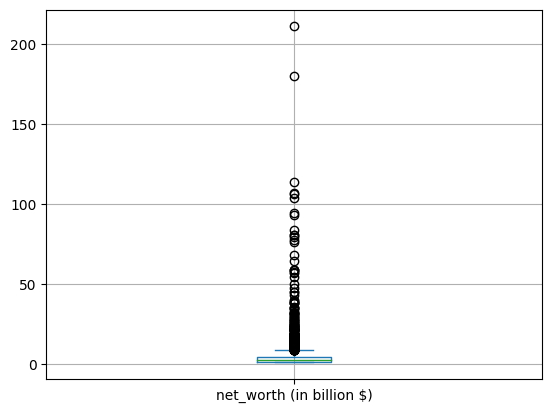

In [17]:
df["net_worth (in billion $)"].plot(kind="box")
plt.grid()

### (1) Find top 2 billionaires with networth more than 120B ?

In [18]:
# 2 outliers which have net-worth greater than 120 and are considered as outliers
df[df["net_worth (in billion $)"] > 120]

,rank,name,net_worth (in billion $),age,country / territory,source,industry
0,1,Bernard Arnault & family,211.0,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive


In [19]:
df["net_worth (in billion $)"].skew()

9.936675

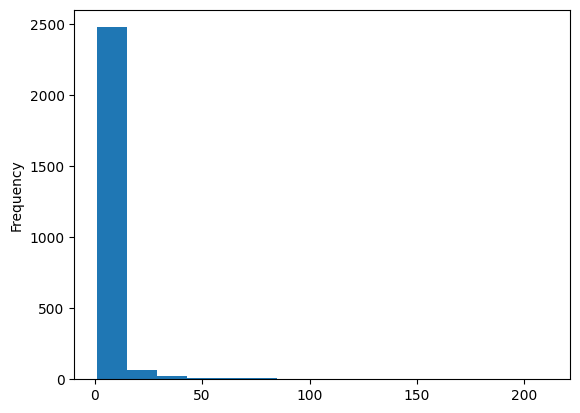

In [20]:
# Networth column is highly (positively) skewed
df["net_worth (in billion $)"].plot(kind="hist", bins=15)
plt.show()

## Age column

In [21]:
df["age"].describe()

count    2588.000000
mean       65.129444
std        13.255592
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64

In [22]:
df["age"].info()

<class 'pandas.core.series.Series'>
Index: 2588 entries, 0 to 2654
Series name: age
Non-Null Count  Dtype  
--------------  -----  
2588 non-null   float64
dtypes: float64(1)
memory usage: 40.4 KB


In [23]:
# 69 missing values
df["age"].isnull().sum()

0

In [24]:
# 69 missing values
df[df["age"].isnull()]

,rank,name,net_worth (in billion $),age,country / territory,source,industry


In [25]:
# Replacing mising values with average
df["age"] = df["age"].fillna(df["age"].mean())
df["age"].isnull().sum()

0

In [26]:
df["age"] = df["age"].astype("int32")

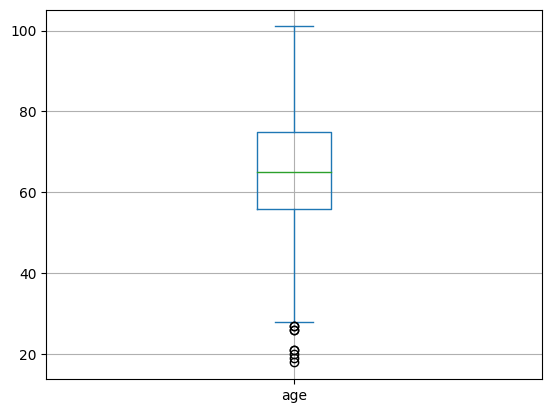

In [27]:
df["age"].plot(kind="box")
plt.grid()

In [28]:
df["age"].skew()

-0.07968930703069327

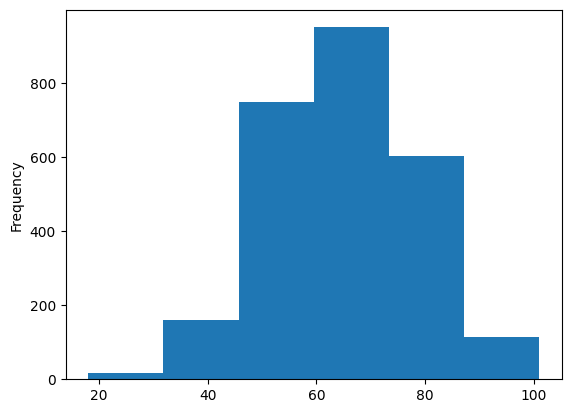

In [29]:
df["age"].plot(kind="hist", bins=6)
plt.show()

### (2) Find young billionaires ?

In [30]:
# Some of the billionaires are youngsters which means they are very young and considered as outliers
df[df["age"] < 27]

,rank,name,net_worth (in billion $),age,country / territory,source,industry
823,818,Luca Del Vecchio,3.5,21,Italy,Eyeglasses,Fashion & Retail
827,818,Clemente Del Vecchio,3.5,18,Italy,Eyeglases,Fashion & Retail
1312,1312,Kevin David Lehmann,2.3,20,Germany,Drugstores,Fashion & Retail
1769,1725,Kim Jung-youn,1.7,19,South Korea,Online gaming,Media & Entertainment
1774,1725,Kim Jung-min,1.7,21,South Korea,Online gaming,Media & Entertainment
1980,1905,Alexandra Andresen,1.5,26,Norway,Investments,Diversified
2062,2020,Wang Zelong,1.4,26,China,Chemicals,Metals & Mining


## Country / Territory Column 

In [31]:
# Find missing
df["country / territory"].isnull().sum()

0

In [32]:
# 18 Unique values in the country / territory column
df["country / territory"].value_counts().nunique()

32

In [33]:
# 18 Unique values in the country / territory column
df["country / territory"] = df["country / territory"].astype("category")

### (3) Find Top 10 countries with most number of billionaires?

In [34]:
df["country / territory"].value_counts().sort_values(ascending=False).head(10)

country / territory
United States     739
China             478
India             169
Germany           108
Russia            106
Hong Kong          64
Italy              63
Canada             62
Brazil             51
United Kingdom     50
Name: count, dtype: int64

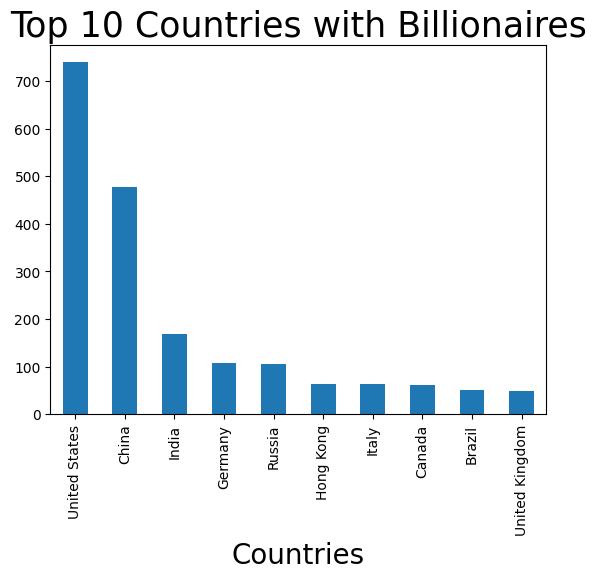

In [35]:
df["country / territory"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Countries with Billionaires", fontsize=25)
plt.xlabel("Countries", fontsize=20)
plt.show()

## Source Column 

In [36]:
df["source"].describe()

count            2588
unique            893
top       Real estate
freq              150
Name: source, dtype: object

In [37]:
# Find missing values
df["source"].isnull().sum()

0

In [38]:
# 18 Unique values in the source column
df["source"].value_counts().nunique()

30

In [39]:
df["source"] = df["source"].astype("category")

### (4) Find top 10 sources of billionaires? 

In [40]:
df["source"].value_counts().sort_values(ascending=False).head(10)

source
Real estate        150
Investments         91
Diversified         87
Pharmaceuticals     83
Software            63
Hedge funds         41
Private equity      40
Chemicals           39
Retail              38
Manufacturing       35
Name: count, dtype: int64

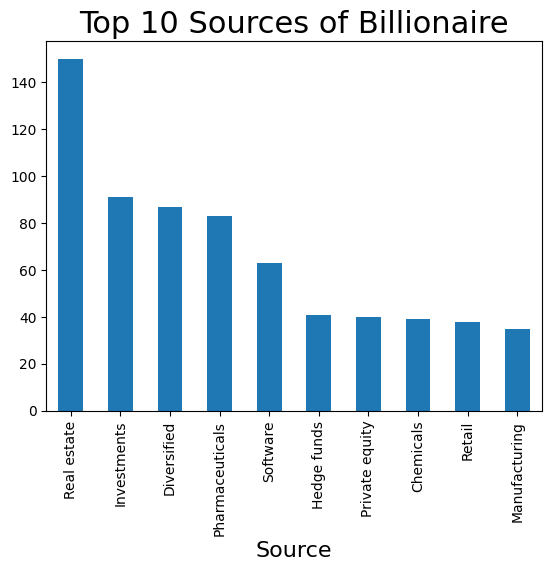

In [41]:
df["source"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Sources of Billionaire", fontsize=22)
plt.xlabel("Source", fontsize=16)
plt.show()

## Industry Column

In [42]:
df["industry"].describe()

count                      2588
unique                       18
top       Finance & Investments
freq                        364
Name: industry, dtype: object

In [43]:
# Find missing values
df["industry"].isnull().sum()

0

In [44]:
# 18 Unique values in the industry column
df["industry"].value_counts().nunique()

18

In [45]:
# 18 Unique values in the industry column
df["industry"] = df["industry"].astype("category")

### (5) Find top 10 industries? 

In [46]:
df["industry"].value_counts().sort_values(ascending=False).head(10)

industry
Finance & Investments    364
Manufacturing            319
Technology               310
Fashion & Retail         259
Food & Beverage          202
Healthcare               196
Real Estate              191
Diversified              182
Energy                    98
Media & Entertainment     89
Name: count, dtype: int64

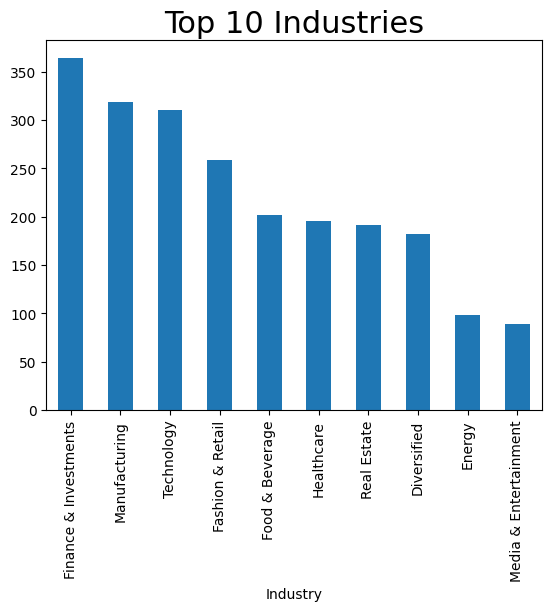

In [47]:
df["industry"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Industries", fontsize=22)
plt.xlabel("Industry")
plt.show()

# EDA ( Exploratory Data Analysis ) 

## Bivariate Data Analysis of Columns 

### (1) Find top 10 billionaires? 

In [48]:
df.groupby("name")["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

name
Bernard Arnault & family     211.000000
Elon Musk                    180.000000
Jeff Bezos                   114.000000
Larry Ellison                107.000000
Warren Buffett               106.000000
Bill Gates                   104.000000
Michael Bloomberg             94.500000
Carlos Slim Helu & family     93.000000
Mukesh Ambani                 83.400002
Steve Ballmer                 80.699997
Name: net_worth (in billion $), dtype: float32

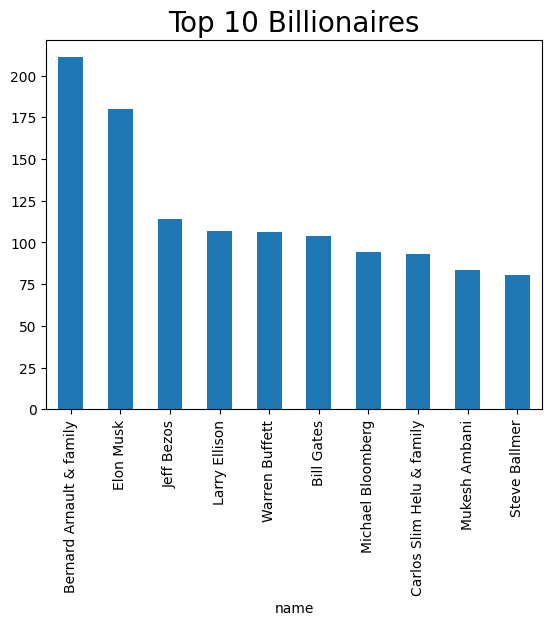

In [49]:
df.groupby("name")["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Billionaires", fontsize=20)
plt.show()

### (2) Find the oldest billionaires in age? 

In [50]:
df.groupby("name")["age"].sum().sort_values(ascending=False).head(10)

name
Fulvio Montipò & family         156
Stanley Motta                   154
George Sakellaris               152
Vera Rechulski Santo Domingo    148
Scott Smith                     146
Eddy Kusnadi Sariaatmadja       138
Neerja Sethi                    136
Wang Yanqing & family           132
Lu Yonghua & family             118
Li Li                           116
Name: age, dtype: int32

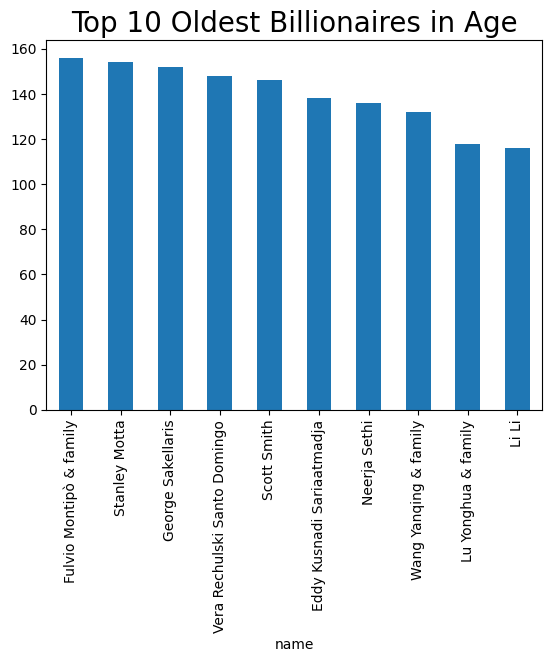

In [51]:
df.groupby("name")["age"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Oldest Billionaires in Age", fontsize=20)
plt.show()

### (3) Find the top 10 youngest billionaires in age?

In [52]:
df.groupby("name")["age"].sum().sort_values(ascending=True).head(10)

name
Clemente Del Vecchio          18
Kim Jung-youn                 19
Kevin David Lehmann           20
Luca Del Vecchio              21
Kim Jung-min                  21
Wang Zelong                   26
Alexandra Andresen            26
Leonardo Maria Del Vecchio    27
Katharina Andresen            27
Ryan Breslow                  28
Name: age, dtype: int32

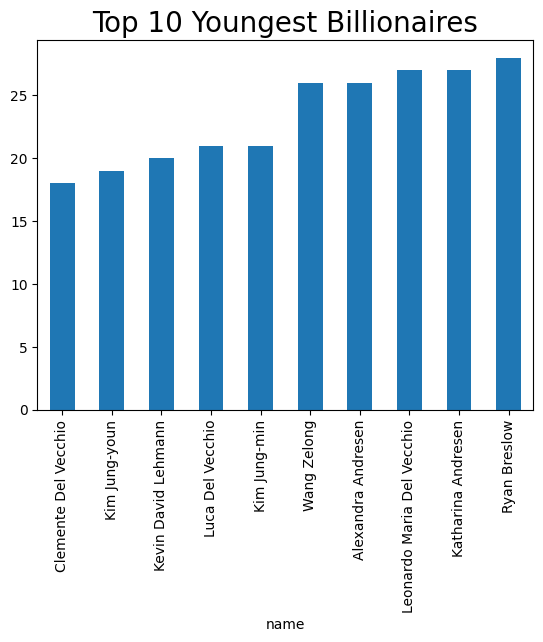

In [53]:
df.groupby("name")["age"].sum().sort_values(ascending=True).head(10).plot(kind="bar")
plt.title("Top 10 Youngest Billionaires", fontsize=20)
plt.show()

### (4) Find top 10 sources with highest networth? 

In [54]:
df.groupby("source")["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

source
Real estate        533.299988
Diversified        384.399994
Investments        336.700012
Hedge funds        271.299988
Pharmaceuticals    252.000000
Walmart            220.899994
LVMH               211.000000
Microsoft          196.399994
Google             189.000000
Tesla, SpaceX      180.000000
Name: net_worth (in billion $), dtype: float32

### (5) Find top 10 industries with highest networth? 

In [55]:
df.groupby("industry")["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

industry
Technology               1857.199951
Fashion & Retail         1659.900024
Finance & Investments    1587.400024
Manufacturing            1009.299988
Food & Beverage           937.099976
Diversified               891.700012
Real Estate               649.400024
Healthcare                633.299988
Automotive                523.400024
Energy                    449.200012
Name: net_worth (in billion $), dtype: float32

<Axes: ylabel='net_worth (in billion $)'>

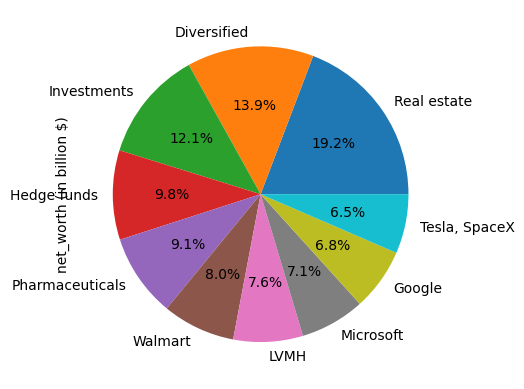

In [56]:
df.groupby("source")["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10).plot(kind="pie", autopct="%0.1f%%")

### (6) Find correlation between net-worth and age with industry?

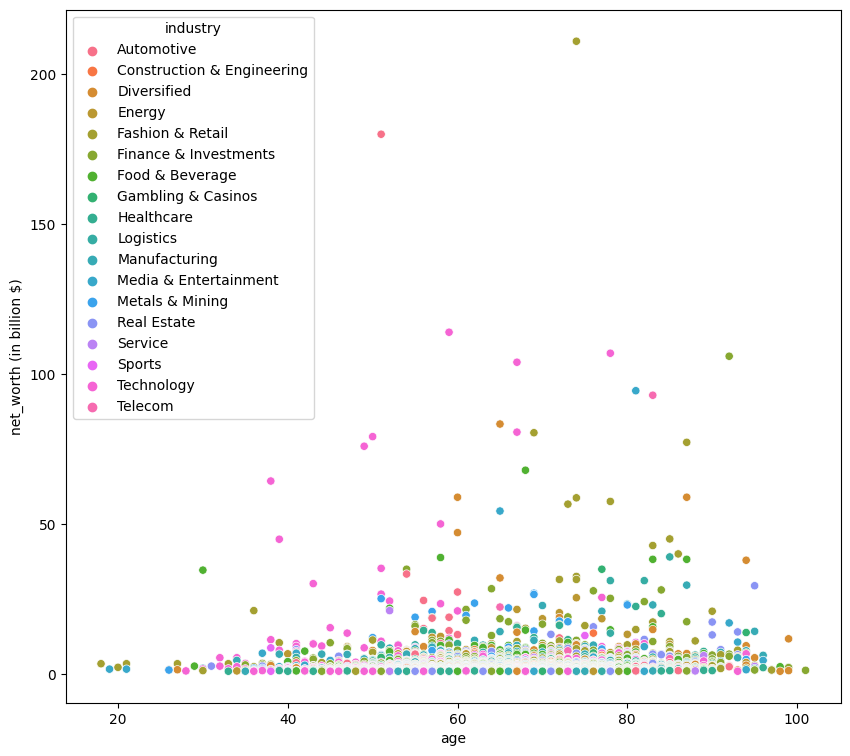

In [57]:
plt.figure(figsize=(10,9))
sns.scatterplot(data = df, x = "age", y = "net_worth (in billion $)", hue="industry")
plt.show()

### FInd top rank countries according to rank? 

In [92]:
df.groupby("country / territory")["rank"].min().sort_values(ascending=True)

country / territory
France                    1
United States             2
Mexico                    8
India                     9
Spain                    13
                       ... 
St. Kitts and Nevis    2133
Estonia                2133
Armenia                2259
Panama                 2540
Bangladesh             2540
Name: rank, Length: 77, dtype: int32

<Axes: xlabel='country / territory'>

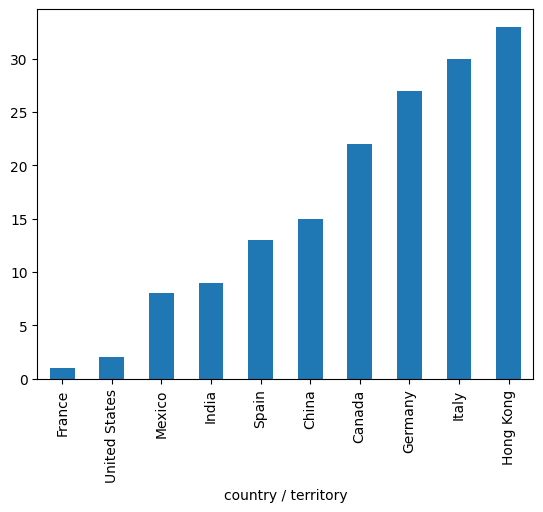

In [96]:
df.groupby("country / territory")["rank"].min().sort_values(ascending=True).head(10).plot(kind="bar")

## Multivariate Analysis of Columns

### (1) Find top 10 billionaires according to country? 

In [58]:
df.groupby(["name", "country / territory"])["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

name                       country / territory
Bernard Arnault & family   France                 211.000000
Elon Musk                  United States          180.000000
Jeff Bezos                 United States          114.000000
Larry Ellison              United States          107.000000
Warren Buffett             United States          106.000000
Bill Gates                 United States          104.000000
Michael Bloomberg          United States           94.500000
Carlos Slim Helu & family  Mexico                  93.000000
Mukesh Ambani              India                   83.400002
Steve Ballmer              United States           80.699997
Name: net_worth (in billion $), dtype: float32

### (2) Find top 10 billionaires with their ages?

In [59]:
df.groupby(["name", "age"])["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

name                       age
Bernard Arnault & family   74     211.000000
Elon Musk                  51     180.000000
Jeff Bezos                 59     114.000000
Larry Ellison              78     107.000000
Warren Buffett             92     106.000000
Bill Gates                 67     104.000000
Michael Bloomberg          81      94.500000
Carlos Slim Helu & family  83      93.000000
Mukesh Ambani              65      83.400002
Steve Ballmer              67      80.699997
Name: net_worth (in billion $), dtype: float32

### (3) 3D representation of net-worth, age and rank?  

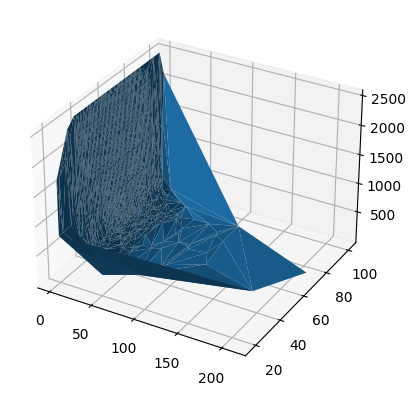

In [60]:
fig = plt.figure()
ax = plt.subplot(projection="3d")
ax.plot_trisurf(df["net_worth (in billion $)"], df["age"], df["rank"])

### (4) Find top 10 networth sources with industries ?

In [61]:
df.groupby(["source", "industry"])["net_worth (in billion $)"].sum().sort_values(ascending=False).head(10)

source           industry             
Real estate      Real Estate              526.900024
Diversified      Diversified              364.500000
Investments      Finance & Investments    302.600006
Hedge funds      Finance & Investments    271.299988
Pharmaceuticals  Healthcare               245.300003
Walmart          Fashion & Retail         220.899994
LVMH             Fashion & Retail         211.000000
Microsoft        Technology               196.399994
Google           Technology               189.000000
Tesla, SpaceX    Automotive               180.000000
Name: net_worth (in billion $), dtype: float32

### (5) Find Frank billionaires with industries and their networth? 

In [78]:
# Frank billionaires
df.loc[df["country / territory"] == "France", ["name", "net_worth (in billion $)", "industry"]]

,name,net_worth (in billion $),industry
0,Bernard Arnault & family,211.000000,Fashion & Retail
10,Francoise Bettencourt Meyers & family,80.500000,Fashion & Retail
27,François Pinault & family,40.099998,Fashion & Retail
40,Alain Wertheimer,31.600000,Fashion & Retail
41,Gerard Wertheimer,31.600000,Fashion & Retail
70,Emmanuel Besnier,22.000000,Food & Beverage
184,Tanya Saadé Zeenny,9.800000,Logistics
185,Rodolphe Saadé,9.800000,Logistics
186,"Jacques Saadé, Jr.",9.800000,Logistics
187,Nicolas Puech,9.800000,Fashion & Retail


### (6) Find US billionaires with industries and their networths? 

In [79]:
# US billionaires
df.loc[df["country / territory"] == "United States", ["name", "net_worth (in billion $)", "industry"]]

,name,net_worth (in billion $),industry
1,Elon Musk,180.0,Automotive
2,Jeff Bezos,114.0,Technology
3,Larry Ellison,107.0,Technology
4,Warren Buffett,106.0,Finance & Investments
5,Bill Gates,104.0,Technology
...,...,...,...
2638,Neerja Sethi,1.0,Technology
2642,Benoit Dageville,1.0,Technology
2647,George Sakellaris,1.0,Energy
2652,Scott Smith,1.0,Technology
